**Import libraries**

In [111]:
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,precision_score,recall_score,f1_score,accuracy_score
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

**Import Datasets**

In [3]:
df=pd.read_csv('/content/drive/MyDrive/new_project/train.csv')


In [67]:
df_test=pd.read_csv('/content/drive/MyDrive/new_project/test.csv')

In [4]:
df.head()

,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f110,f111,f112,f113,f114,f115,f116,f117,f118,claim
0,0,0.10859,0.004314,-37.566,0.017364,0.28915,-10.25100,135.12,168900.0,3.992400e+14,...,-12.2280,1.7482,1.90960,-7.11570,4378.80,1.2096,8.613400e+14,140.1,1.01770,1
1,1,0.10090,0.299610,11822.000,0.276500,0.45970,-0.83733,1721.90,119810.0,3.874100e+15,...,-56.7580,4.1684,0.34808,4.14200,913.23,1.2464,7.575100e+15,1861.0,0.28359,0
2,2,0.17803,-0.006980,907.270,0.272140,0.45948,0.17327,2298.00,360650.0,1.224500e+13,...,-5.7688,1.2042,0.26290,8.13120,45119.00,1.1764,3.218100e+14,3838.2,0.40690,1
3,3,0.15236,0.007259,780.100,0.025179,0.51947,7.49140,112.51,259490.0,7.781400e+13,...,-34.8580,2.0694,0.79631,-16.33600,4952.40,1.1784,4.533000e+12,4889.1,0.51486,1
4,4,0.11623,0.502900,-109.150,0.297910,0.34490,-0.40932,2538.90,65332.0,1.907200e+15,...,-13.6410,1.5298,1.14640,-0.43124,3856.50,1.4830,-8.991300e+12,NaN,0.23049,1


In [68]:
df_test.head()

,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f109,f110,f111,f112,f113,f114,f115,f116,f117,f118
0,957919,0.165850,0.487050,1295.00,0.02310,0.31900,0.90188,573.29,3743.7,2.705700e+12,...,0.16253,-22.1890,2.0655,0.430880,-10.7410,81606.0,1.1940,1.980400e+14,2017.1,0.46357
1,957920,0.129650,0.373480,1763.00,0.72884,0.33247,-1.26310,875.55,554370.0,5.955700e+14,...,0.81528,-1.6342,1.5736,-1.071200,11.8320,90114.0,1.1507,4.388000e+16,6638.9,0.28125
2,957921,0.120190,0.445210,736.26,0.04615,0.29605,0.31665,2659.50,317140.0,3.977800e+14,...,0.81831,-32.7800,2.1364,-1.931200,-3.2804,37739.0,1.1548,1.718100e+14,5844.0,0.13797
3,957922,0.054008,0.395960,996.14,0.85934,0.36678,-0.17060,386.56,325680.0,-3.432200e+13,...,0.86559,-2.4162,1.5199,-0.011633,1.3840,26849.0,1.1490,2.138800e+17,6173.3,0.32910
4,957923,0.079947,-0.006919,10574.00,0.34845,0.45008,-1.84200,3027.00,428150.0,9.291500e+11,...,0.25190,-18.6300,3.7387,0.757080,-4.9405,50336.0,1.2488,2.151300e+17,2250.1,0.33796


**Data preprocessing**

In [5]:
df.shape

(957919, 120)

In [69]:
df_test.shape

(493474, 119)

In [6]:
df.columns

Index(['id', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9',
       ...
       'f110', 'f111', 'f112', 'f113', 'f114', 'f115', 'f116', 'f117', 'f118',
       'claim'],
      dtype='object', length=120)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 957919 entries, 0 to 957918
Columns: 120 entries, id to claim
dtypes: float64(118), int64(2)
memory usage: 877.0 MB


In [70]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 493474 entries, 0 to 493473
Columns: 119 entries, id to f118
dtypes: float64(118), int64(1)
memory usage: 448.0 MB


In [8]:
df.isnull().sum()

id           0
f1       15247
f2       15190
f3       15491
f4       15560
         ...  
f115     15559
f116     15589
f117     15407
f118     15212
claim        0
Length: 120, dtype: int64

In [71]:
df_test.isnull().sum()

id         0
f1      7812
f2      7891
f3      7795
f4      7733
        ... 
f114    7942
f115    7977
f116    8083
f117    7763
f118    7885
Length: 119, dtype: int64

In [9]:
df.dropna(inplace=True)

In [73]:
df_test.dropna(inplace=True)
test_df=df_test.copy()

**Distribution and correlation od datasets**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


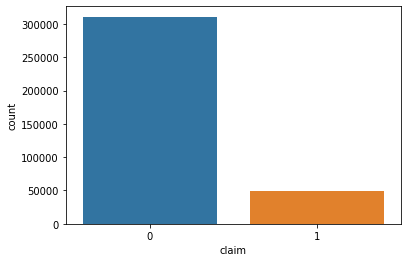

In [10]:
sns.countplot(df["claim"])

Train data


NameError: ignored

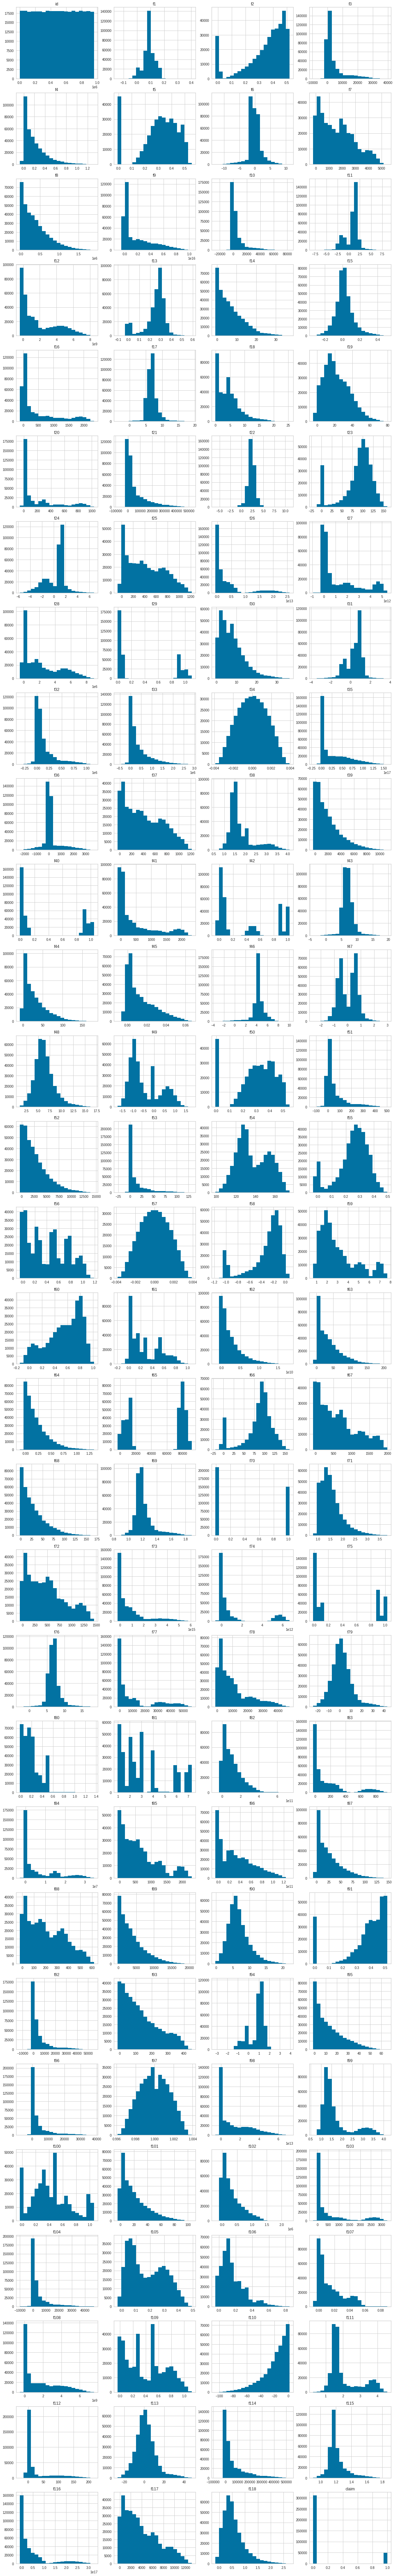

In [100]:
print('Train data')
fig = plt.figure(figsize = (20, 140))
for idx, i in enumerate(df.columns):
    fig.add_subplot(np.ceil(len(df.columns)/4), 4, idx+1)
    df.iloc[:, idx].hist(bins = 20)
    plt.title(i)

plt.show()

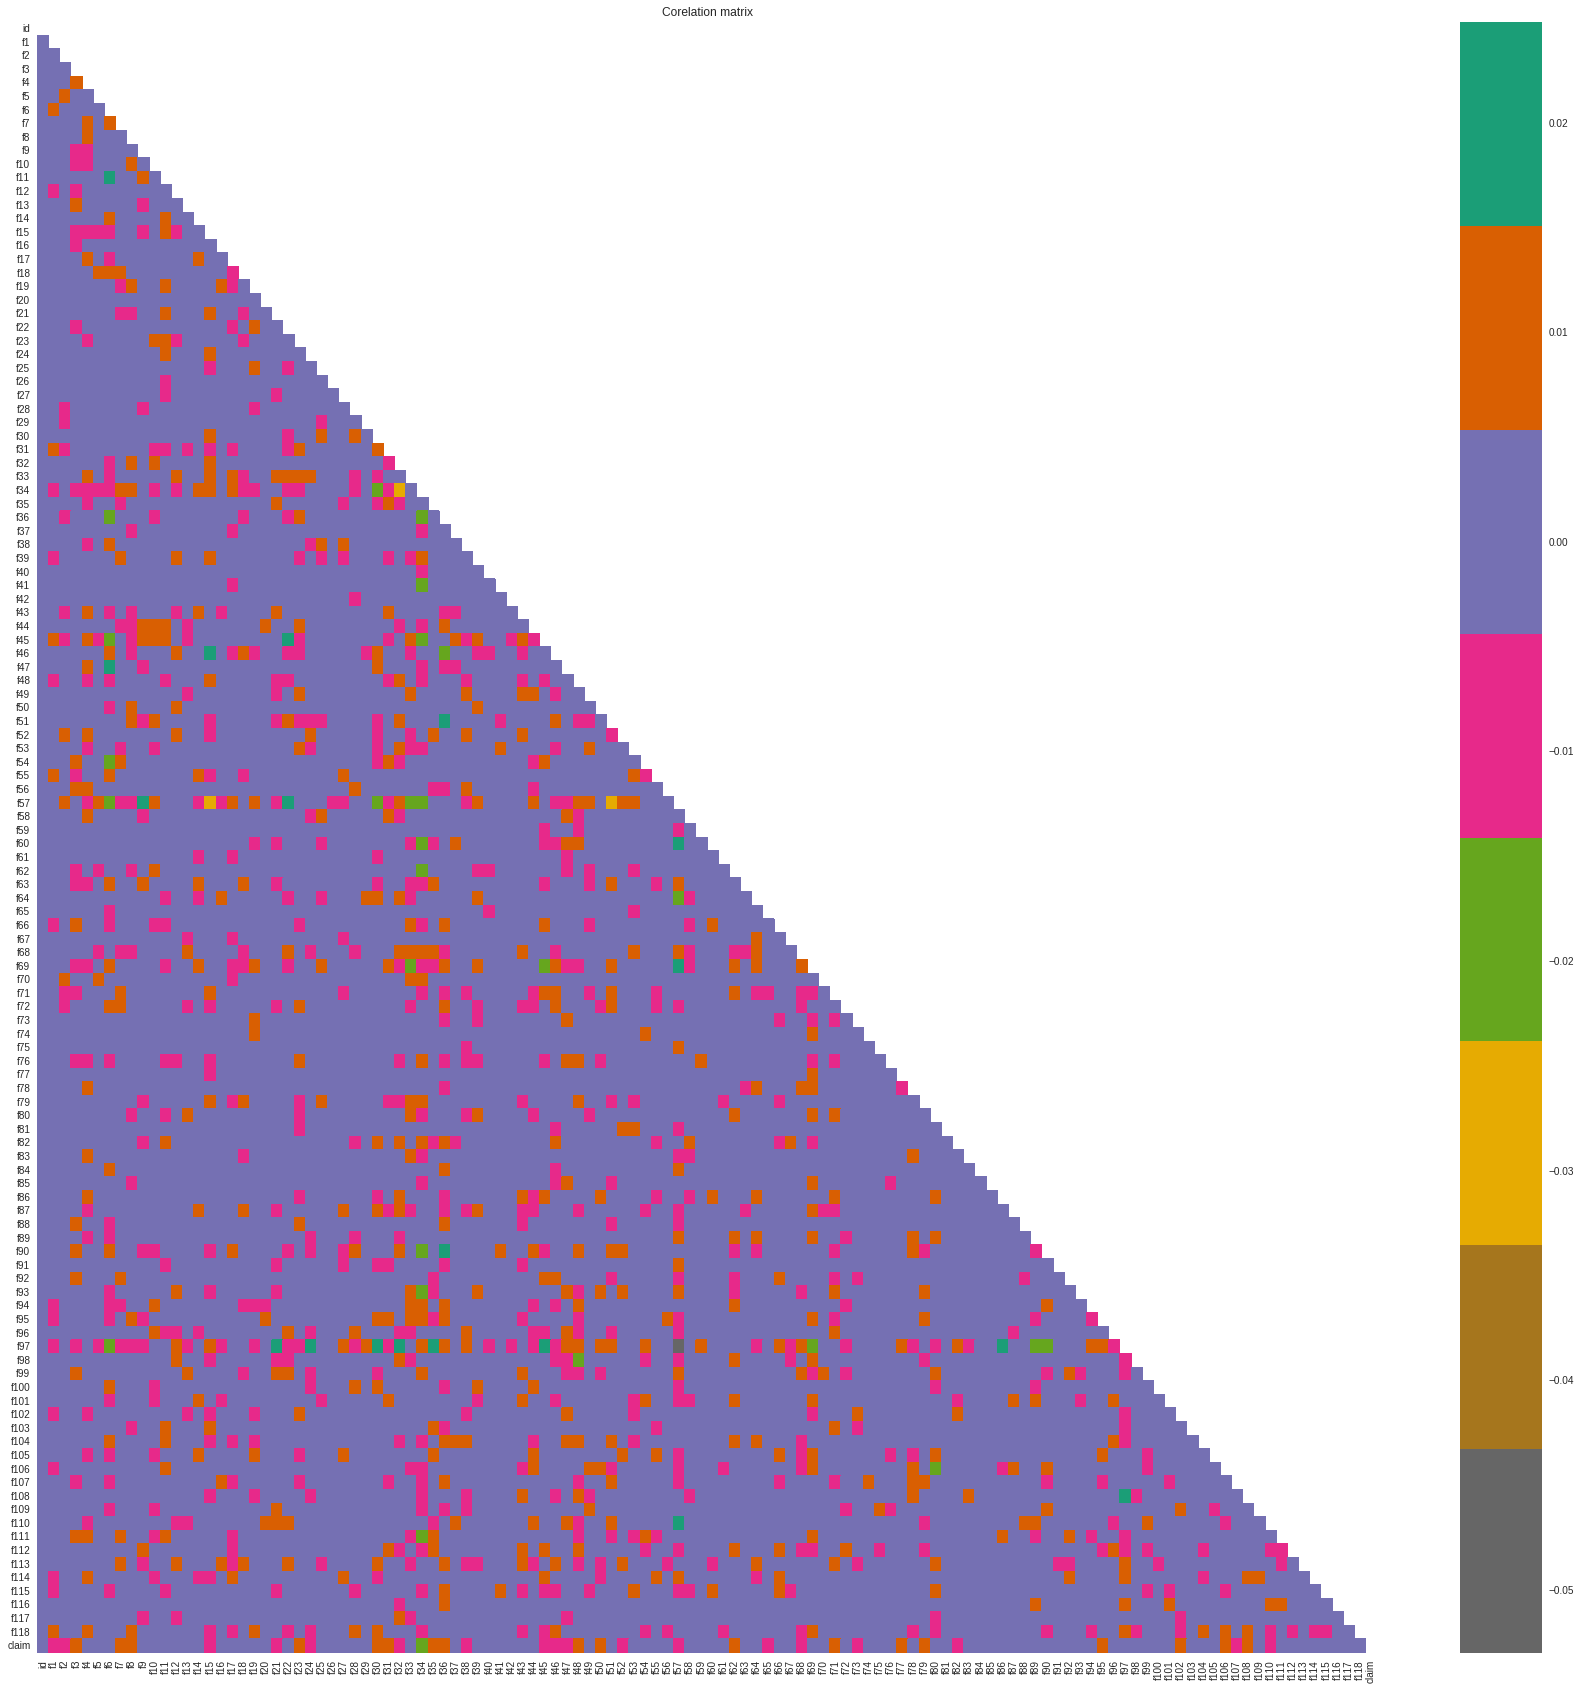

In [108]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))

plt.figure(figsize = (30, 30))
plt.title('Corelation matrix')
sns.heatmap(corr, mask = mask, cmap = 'Dark2_r')
plt.show()
#rr' is not a valid value for name; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu',
# 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 
#'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r'

Test data


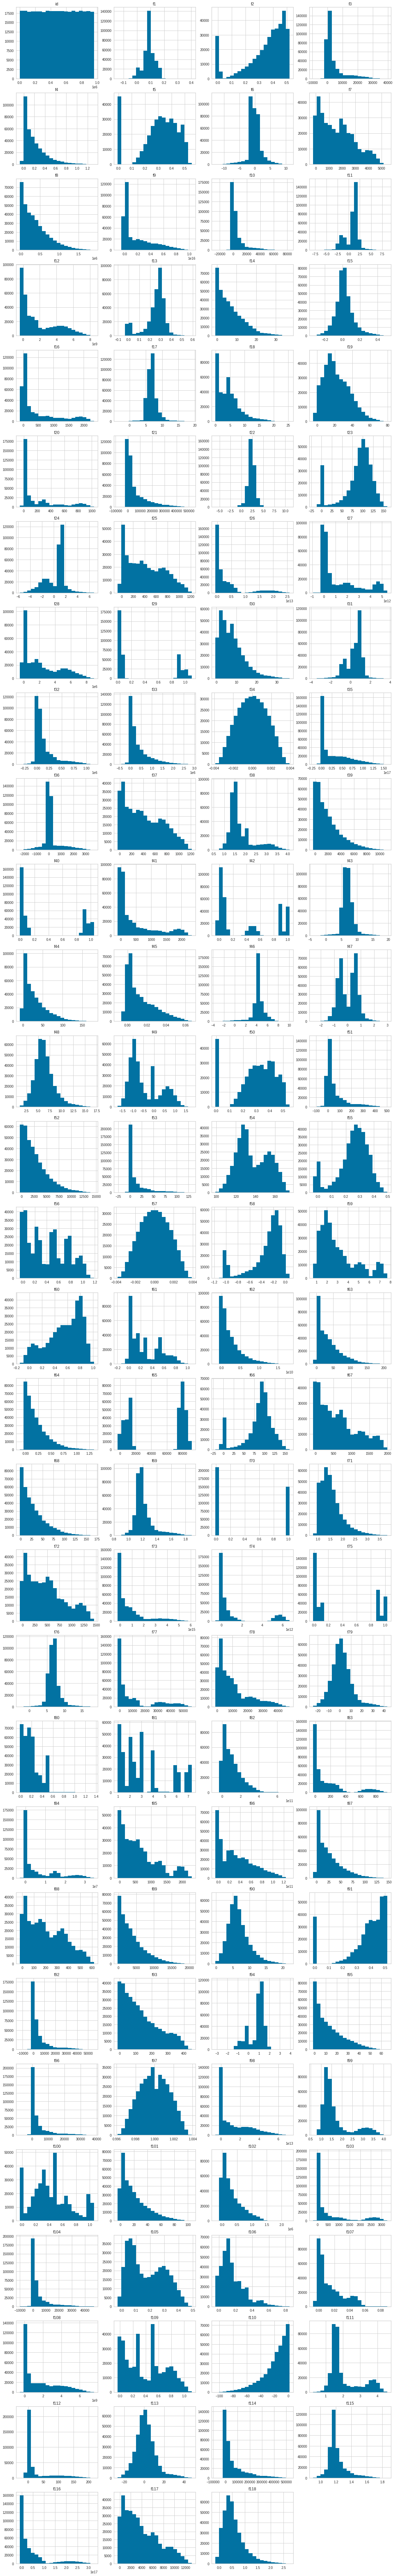

In [109]:
print('Test data')
fig = plt.figure(figsize = (20, 140))
for idx, i in enumerate(test_df.columns):
    fig.add_subplot(np.ceil(len(test_df.columns)/4), 4, idx+1)
    df.iloc[:, idx].hist(bins = 20)
    plt.title(i)

plt.show()

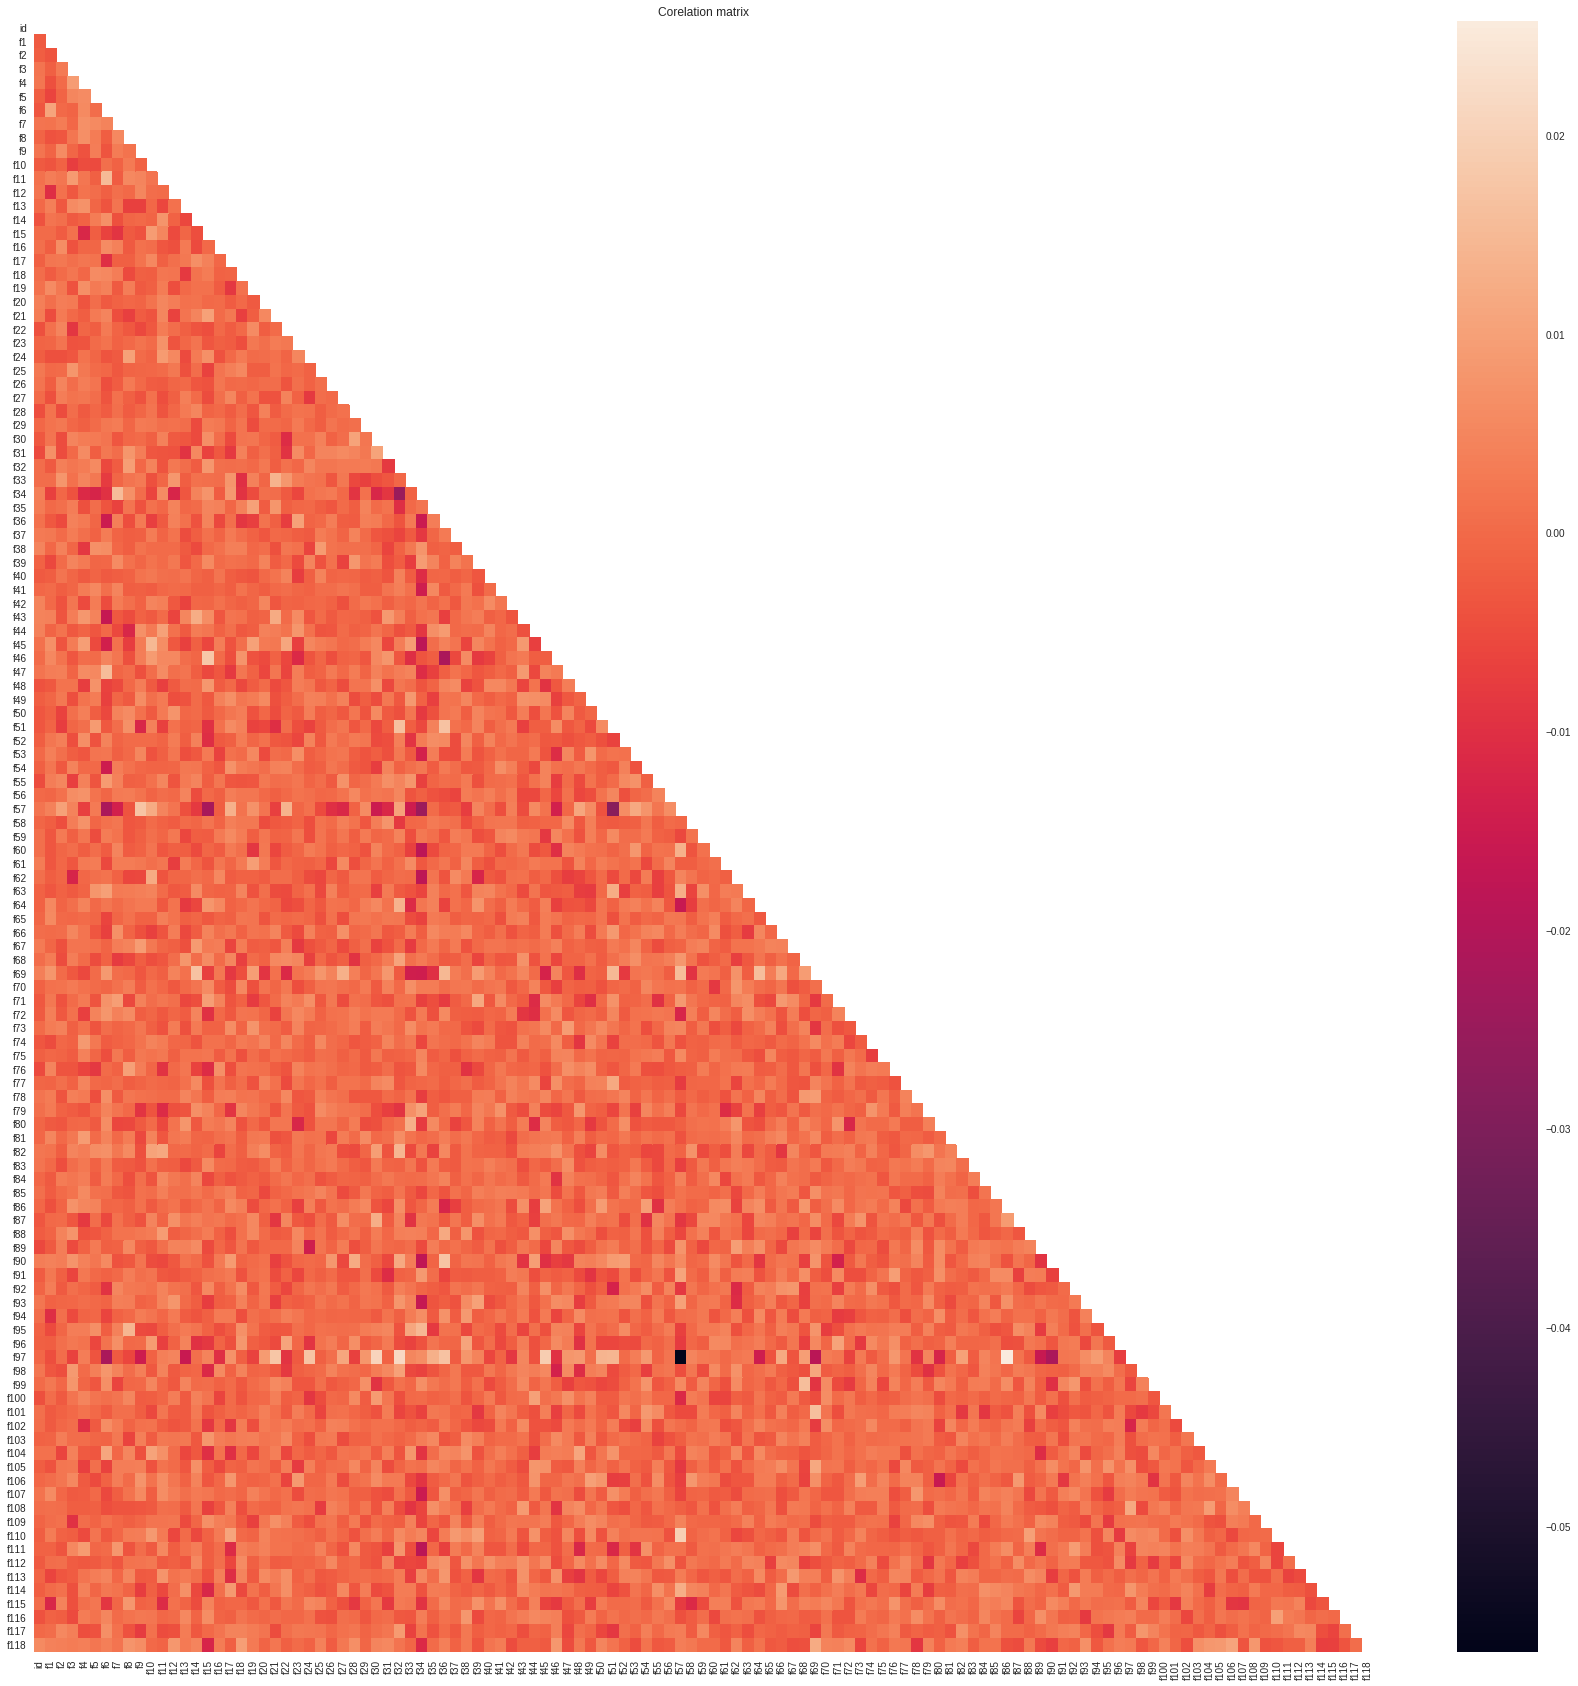

In [110]:
corr = test_df.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))

plt.figure(figsize = (30, 30))
plt.title('Corelation matrix')
sns.heatmap(corr, mask = mask)
plt.show()

**Dependent and independent variables**

In [11]:
x = df.drop(columns=["claim", "id"])
y = df.claim

In [76]:
df_test.drop('id',axis=1,inplace=True)

**Train test split**

In [12]:
from sklearn.model_selection import train_test_split


X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.33, 
                                                    stratify=y, random_state=42)

**Standardization**

In [13]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [78]:
df_test=scaler.fit_transform(df_test)

**Machine learning Models**

**Logistic Regression**

In [15]:
X_train = np.nan_to_num(X_train)
y_train = np.nan_to_num(y_train)

In [16]:
X_val = np.nan_to_num(X_val)
y_val = np.nan_to_num(y_val)


In [17]:
# fit the model
model = LogisticRegression(max_iter=250)
model.fit(X_train, y_train)

LogisticRegression(max_iter=250)

In [18]:
# make prediction
pred_1 = model.predict(X_val)

**Prediction on test Data**

In [82]:
pred_log=model.predict_proba(df_test)[:, 1]

In [83]:
pred_log[:50]

array([0.10095321, 0.13226736, 0.16202792, 0.14247785, 0.13355668,
       0.10677963, 0.15734427, 0.12394959, 0.13409821, 0.1227491 ,
       0.16265539, 0.14438074, 0.15049953, 0.12699298, 0.1708356 ,
       0.1352768 , 0.10793017, 0.13869861, 0.17162825, 0.16369825,
       0.12926013, 0.15423873, 0.15623232, 0.12055373, 0.14722467,
       0.16490562, 0.12784038, 0.13618511, 0.11500241, 0.10997269,
       0.15991407, 0.09355229, 0.13291733, 0.18283069, 0.13762321,
       0.15144535, 0.13108164, 0.1614058 , 0.12821133, 0.15248906,
       0.13701945, 0.13824891, 0.13556191, 0.17774329, 0.13479337,
       0.12036556, 0.12151468, 0.14639761, 0.13349115, 0.13685958])

In [19]:
print("Training set score: {:.4f}".format(model.score(X_train,y_train)))

print("Validation set score: {:.4f}".format(model.score(X_val,y_val)))

Training set score: 0.8649
Validation set score: 0.8649


**Evaluation Metrics**

In [112]:
print("the precsion score is : ",precision_score(y_val,pred_1,average='weighted'))
print("the recall score is :",recall_score(y_val,pred_1,average='weighted'))
print("the f1 measure is ",f1_score(y_val,pred_1,average='weighted'))

the precsion score is :  0.748097250530228
the recall score is : 0.864926153223631
the f1 measure is  0.8022808294442108


In [62]:
acc=accuracy_score(y_val,pred_1)
print("The accuracy of random forest is",acc)
ns_auc = roc_auc_score(y_val, pred_1)
print("auc score of random forest is",ns_auc)

The accuracy of random forest is 0.864926153223631
auc score of random forest is 0.5


In [63]:
d={
    'metricss':["Accuracy","Precision","recall","F1_Measure"],
'logistics_results':['86%','74%','86%','80%'],

}
df_result=pd.DataFrame(data=d)
df_result.set_index('metricss').T

metricss,Accuracy,Precision,recall,F1_Measure
logistics_results,86%,74%,86%,80%


**Random Forest**

In [23]:
model_2=RandomForestClassifier()
model_2.fit(X_train, y_train)

RandomForestClassifier()

In [24]:
# make prediction
pred_3 = model_2.predict(X_val)

**Prediction on test Data**

In [84]:
pred_forest=model_2.predict_proba(df_test)[:, 1]

In [86]:
pred_forest[:50]

array([0.06, 0.17, 0.12, 0.19, 0.27, 0.06, 0.17, 0.16, 0.12, 0.15, 0.09,
       0.24, 0.11, 0.11, 0.23, 0.18, 0.11, 0.22, 0.07, 0.26, 0.16, 0.14,
       0.21, 0.14, 0.08, 0.24, 0.16, 0.24, 0.18, 0.23, 0.29, 0.1 , 0.11,
       0.17, 0.14, 0.17, 0.09, 0.22, 0.22, 0.16, 0.16, 0.18, 0.17, 0.27,
       0.16, 0.17, 0.07, 0.12, 0.1 , 0.15])

In [44]:
# Checking for Overfitting or Underfitting the data

print("Training set score: {:.4f}".format(model_2.score(X_train,y_train)))

print("validation set score: {:.4f}".format(model_2.score(X_val,y_val)))

Training set score: 1.0000
validation set score: 0.8649


**Evaluation Metrics**

In [113]:
print("the precsion score is : ",precision_score(y_val, pred_3,average='weighted'))
print("the recall score is :",recall_score(y_val, pred_3,average='weighted'))
print("the f1 measure is ",f1_score(y_val, pred_3,average='weighted'))

the precsion score is :  0.748097250530228
the recall score is : 0.864926153223631
the f1 measure is  0.8022808294442108


In [58]:
acc=accuracy_score(y_val,pred_3)
print("The accuracy of random forest is",acc)
ns_auc = roc_auc_score(y_val, pred_3)
print("auc score of random forest is",ns_auc)

The accuracy of random forest is 0.864926153223631
auc score of random forest is 0.5


In [54]:
d={
'metricss':["Accuracy","Precision","recall","F1_Measure"],
'Random Forest results':['86%','74%','86%','80%'],
}
df_result=pd.DataFrame(data=d)
df_result.set_index('metricss').T

metricss,Accuracy,Precision,recall,F1_Measure
Random Forest results,86%,74%,86%,80%


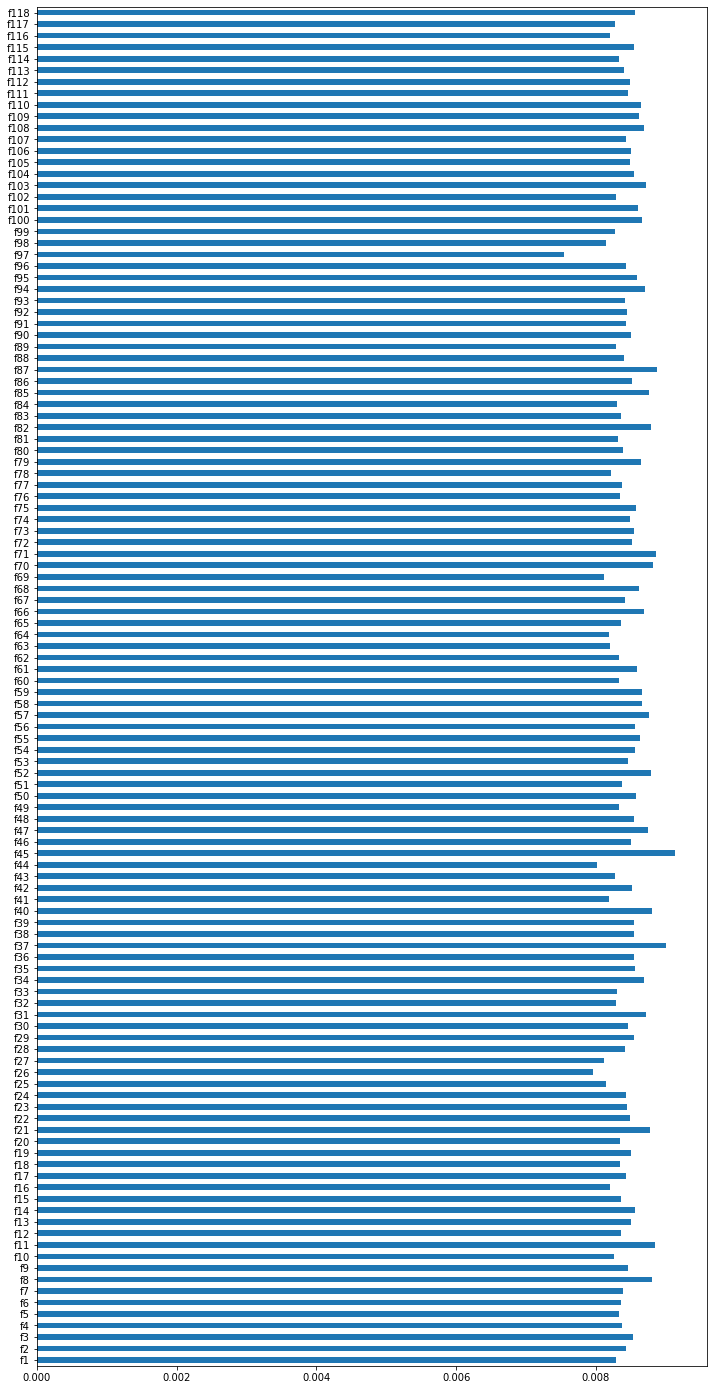

In [29]:
# extract feature importances, convert into a Series
importances = pd.Series(model_2.feature_importances_, index=x.columns)

# plot the horizontal bar chart
importances.plot(kind='barh', figsize=(12,25))

**Decision Tree**

In [31]:
model_3=DecisionTreeClassifier()
model_3.fit(X_train, y_train)

DecisionTreeClassifier()

In [32]:
# make prediction
pred_4 = model_3.predict(X_val)

**Prediction on test Data**

In [89]:
pred_tree=model_3.predict_proba(df_test)[:, 1]

In [90]:
pred_tree[:50]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
       1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [33]:
# Checking for Overfitting or Underfitting the data

print("Training set score: {:.4f}".format(model_3.score(X_train,y_train)))

print("validation set score: {:.4f}".format(model_3.score(X_val,y_val)))

Training set score: 1.0000
validation set score: 0.7561


**Evaluation Metrics**

In [51]:
print("the precsion score is : ",precision_score(y_val, pred_4,average='weighted'))
print("the recall score is :",recall_score(y_val, pred_4,average='weighted'))
print("the f1 measure is ",f1_score(y_val, pred_4,average='weighted'))

the precsion score is :  0.7676466096231079
the recall score is : 0.7560527380631238
the f1 measure is  0.7617231026035657


In [59]:
acc=accuracy_score(y_val,pred_4)
print("The accuracy of decision tree is",acc)
ns_auc = roc_auc_score(y_val, pred_4)
print("auc score of decision tree is",ns_auc)

The accuracy of decision tree is 0.7560527380631238
auc score of decision tree is 0.5029180882303036


In [65]:
d={
'metricss':["Accuracy","Precision","recall","F1_Measure"],
'Decision Tree results':['75%','76%','75%','76%'],
}
df_result=pd.DataFrame(data=d)
df_result.set_index('metricss').T

metricss,Accuracy,Precision,recall,F1_Measure
Decision Tree results,75%,76%,75%,76%


**KNN**

In [36]:
knn = KNeighborsClassifier(n_neighbors=7)

In [37]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [38]:
pred_5=knn.predict(X_val)

**Prediction on test Data**

In [91]:
pred_knn=knn.predict_proba(df_test)[:, 1]

In [92]:
pred_knn[:50]

array([0.28571429, 0.14285714, 0.        , 0.        , 0.        ,
       0.14285714, 0.28571429, 0.14285714, 0.        , 0.        ,
       0.14285714, 0.        , 0.        , 0.14285714, 0.        ,
       0.        , 0.        , 0.14285714, 0.14285714, 0.        ,
       0.14285714, 0.14285714, 0.28571429, 0.28571429, 0.        ,
       0.42857143, 0.28571429, 0.14285714, 0.        , 0.28571429,
       0.14285714, 0.28571429, 0.28571429, 0.14285714, 0.14285714,
       0.14285714, 0.14285714, 0.14285714, 0.14285714, 0.14285714,
       0.14285714, 0.28571429, 0.14285714, 0.14285714, 0.14285714,
       0.28571429, 0.14285714, 0.        , 0.14285714, 0.        ])

In [39]:
# Checking for Overfitting or Underfitting the data

print("Training set score: {:.4f}".format(knn.score(X_train,y_train)))

print("validation set score: {:.4f}".format(knn.score(X_val,y_val)))

Training set score: 0.8665
validation set score: 0.8594


**Evaluation Metrics**

In [52]:
print("the precsion score is : ",precision_score(y_val, pred_5,average='weighted'))
print("the recall score is :",recall_score(y_val, pred_5,average='weighted'))
print("the f1 measure is ",f1_score(y_val, pred_5,average='weighted'))

the precsion score is :  0.7663078697885438
the recall score is : 0.8594466549770704
the f1 measure is  0.8013929417380229


In [60]:
acc=accuracy_score(y_val,pred_5)
print("The accuracy of decision tree is",acc)
ns_auc = roc_auc_score(y_val, pred_5)
print("auc score of decision tree is",ns_auc)

The accuracy of decision tree is 0.8594466549770704
auc score of decision tree is 0.49999221703882685


In [64]:
d={
'metricss':["Accuracy","Precision","recall","F1_Measure"],
'KNN results':['85%','76%','85%','80%'],
}
df_result=pd.DataFrame(data=d)
df_result.set_index('metricss').T

metricss,Accuracy,Precision,recall,F1_Measure
KNN results,85%,76%,85%,80%


**Performance comparision**

In [66]:
d={
    'metricss':["Accuracy","Precision","recall","F1_Measure"],
'logistics_results':['86%','74%','86%','80%'],
'Random Forest results':['86%','74%','86%','80%'],
'Decision Tree results':['75%','76%','75%','76%'],
'KNN results':['85%','76%','85%','80%'],
}
df_result=pd.DataFrame(data=d)
df_result.set_index('metricss')

,logistics_results,Random Forest results,Decision Tree results,KNN results
metricss,,,,
Accuracy,86%,86%,75%,85%
Precision,74%,74%,76%,76%
recall,86%,86%,75%,85%
F1_Measure,80%,80%,76%,80%


**final_Submission**

In [98]:
test_df.drop_duplicates(subset=['id'])
submission = pd.DataFrame()
submission['claim']=pred_forest
submission['ID']=test_df['id'].unique()
pd.DataFrame(submission,
columns=['ID','claim']).to_csv('submission_.csv')